# Binary baseband sample data and the spectrum baseline
Xiaoyun MA Aug. 4, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Baseband data format
### Raw binary data, sample type: 8bit signed integer, range from -127 to 127

In [2]:
fname = "sat_samples_mini.bin"
data = np.fromfile(fname, dtype=np.int8)

# Length of data

In [3]:
print ("Len of data:", data.shape[0], "samples")

Len of data: 1048576000 samples


# Procedure of power spectrum calculation
1. Obtain FFT of a segment (N point samples, default: 1024 samples, int8).
2. Calculate square of modulus of FFT complex results (complex128).
3. Accumulating results of segments. (float64)
4. Convert to power log scale 20*log10(x) (float64)
* **last segment is abondened, not zero-padded**

In [4]:
def accfft(x, len = 1024):
    nSeg = x.shape[0] // len
    r = np.zeros(len//2+1, dtype = np.float64)
    for i in range(nSeg):
        r += np.absolute(np.fft.rfft(x[i*len :(i+1)*len]))**2
    return 20*np.log10(r)

# Generating float64 FFT power spectrum baseline

In [5]:
# FFTLength:  1024    Time used: 16.808974981307983
# FFTLength:  2048    Time used: 14.133329153060913
# FFTLength:  4096    Time used: 12.997093200683594
# FFTLength:  8192    Time used: 13.064345598220825
# FFTLength:  16384   Time used: 12.948936700820923
# FFTLength:  32768   Time used: 13.061393976211548
# FFTLength:  65536   Time used: 17.141109228134155
# FFTLength:  131072  Time used: 17.440105199813843
# FFTLength:  262144  Time used: 18.62742328643799
# FFTLength:  524288  Time used: 20.316184997558594
# FFTLength:  1048576 Time used: 22.477303504943848
# FFTLength:  2097152 Time used: 29.854413509368896

In [6]:
fft_len_list = [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152] # 2^(10-22)
#%timeit -r 1 r=accfft_fast(data, len = 1024)
for fft_len in fft_len_list:
    print("FFTLength: ", fft_len)
    npyname='sat_samples_spec_'+str(fft_len)+'.npy'
    start = time.time()
    with open(npyname, 'wb') as f:
        np.save(f, accfft(data, fft_len))
    end = time.time()
    print("Time used:", end - start)

FFTLength:  1024
Time used: 16.648723602294922
FFTLength:  2048
Time used: 14.229410648345947
FFTLength:  4096
Time used: 13.004057168960571
FFTLength:  8192
Time used: 13.097050905227661
FFTLength:  16384
Time used: 13.208263635635376
FFTLength:  32768
Time used: 13.155067443847656
FFTLength:  65536
Time used: 17.217386484146118
FFTLength:  131072
Time used: 17.468968629837036
FFTLength:  262144
Time used: 18.6650550365448
FFTLength:  524288
Time used: 20.068787813186646
FFTLength:  1048576
Time used: 21.78580951690674
FFTLength:  2097152
Time used: 28.42456316947937


# Generating Figures

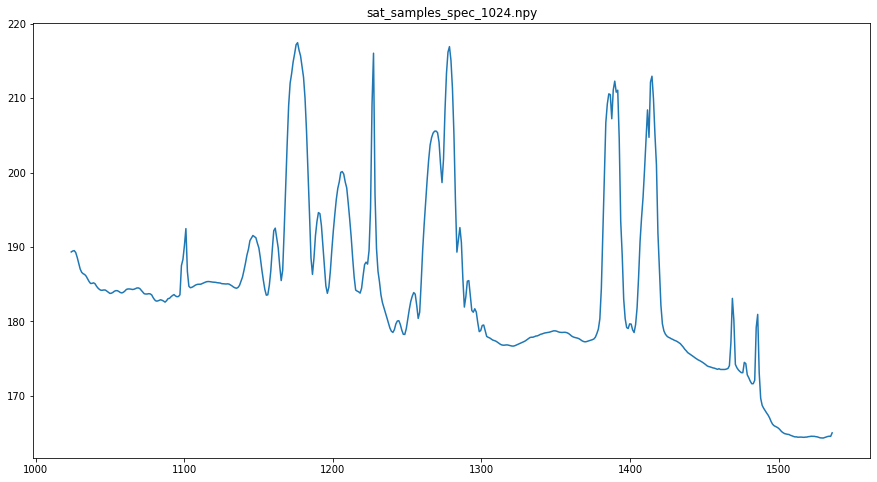

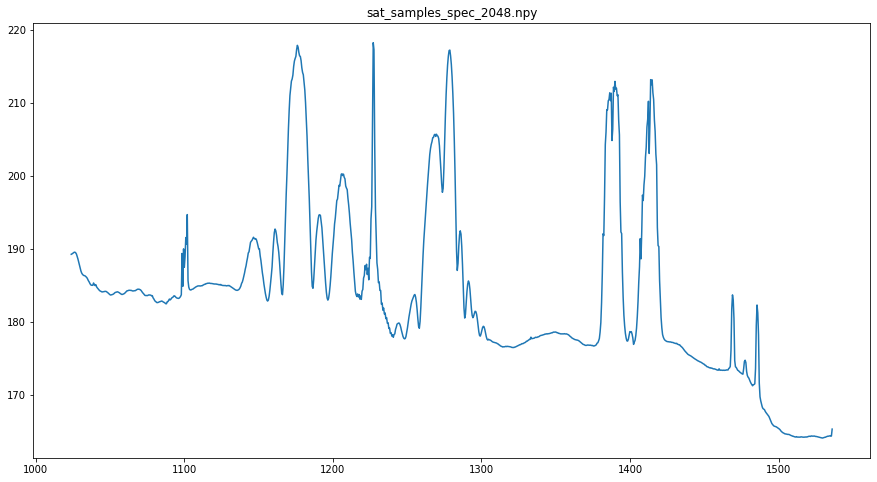

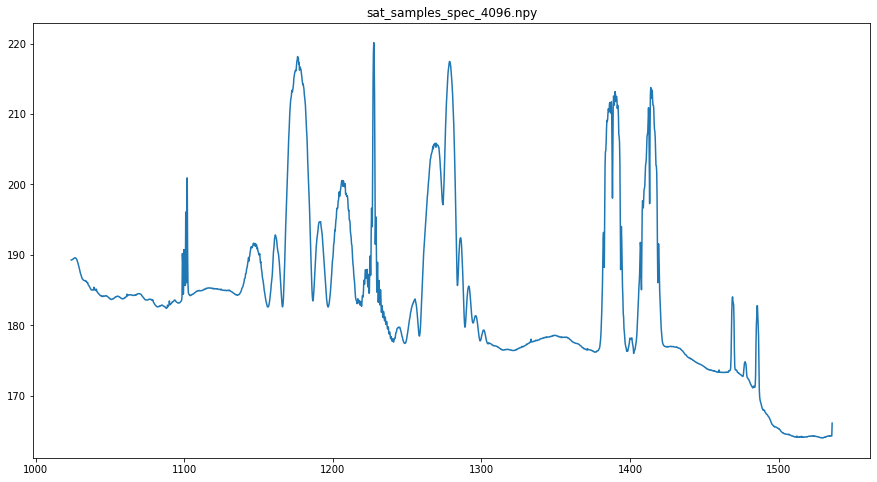

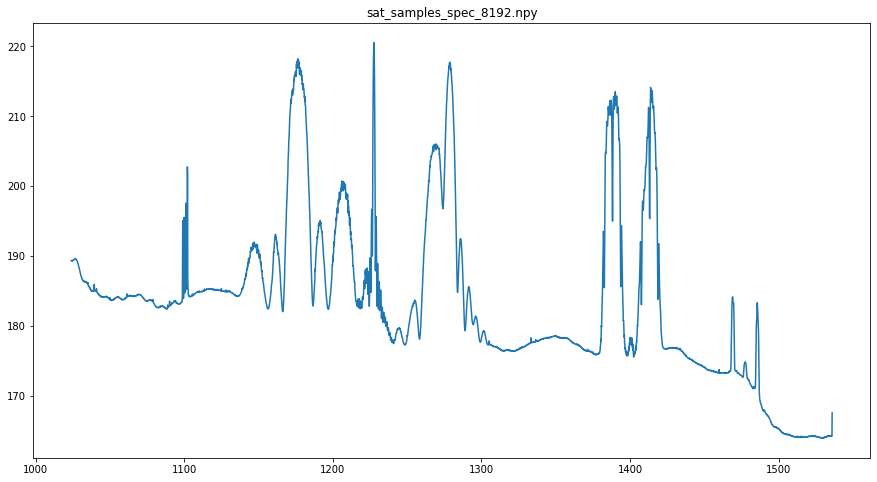

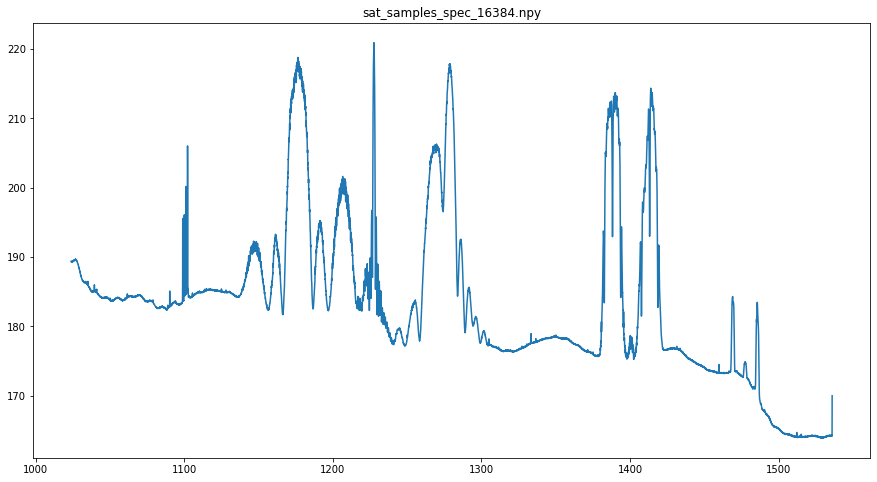

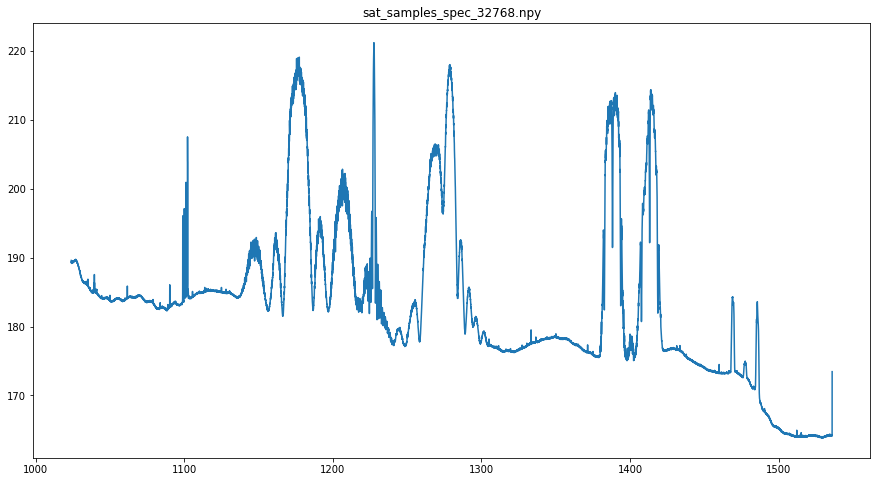

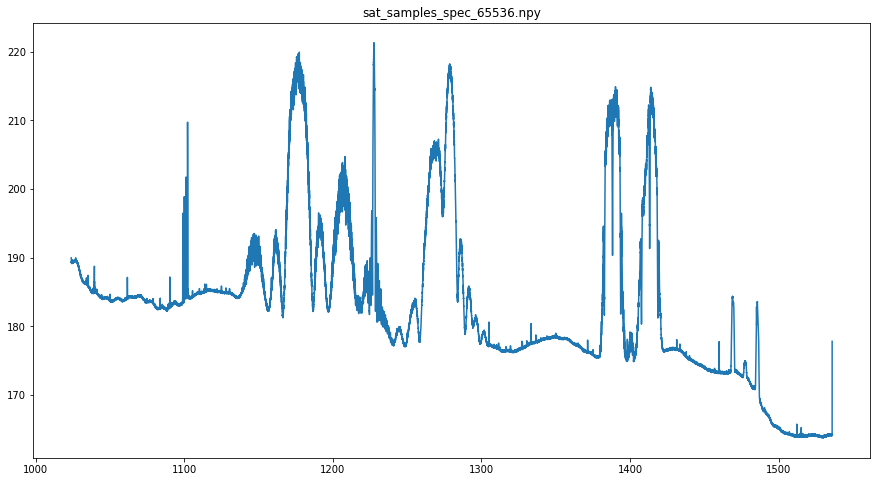

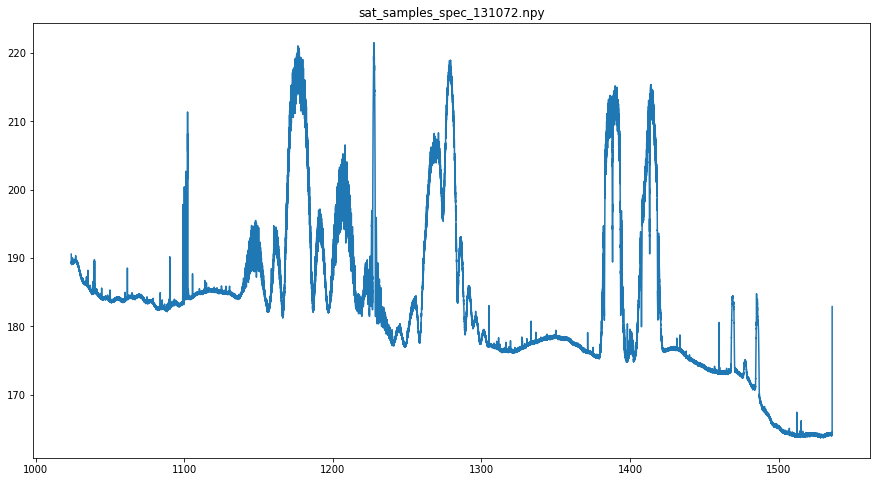

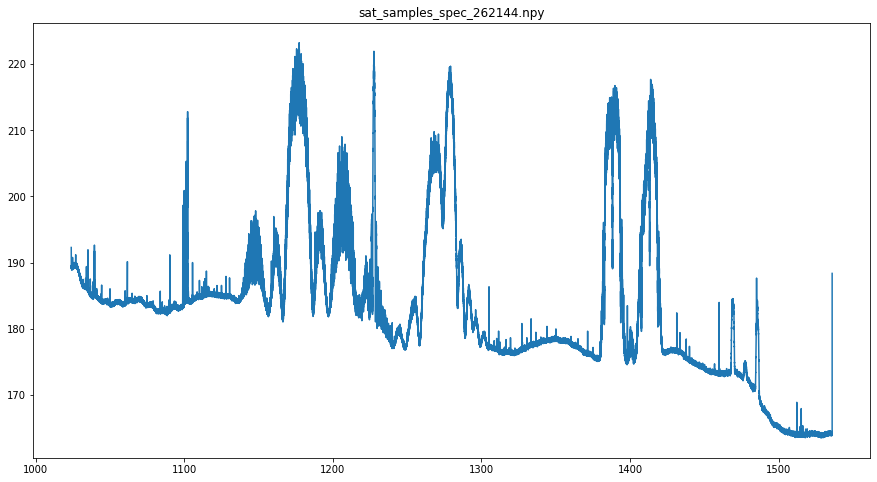

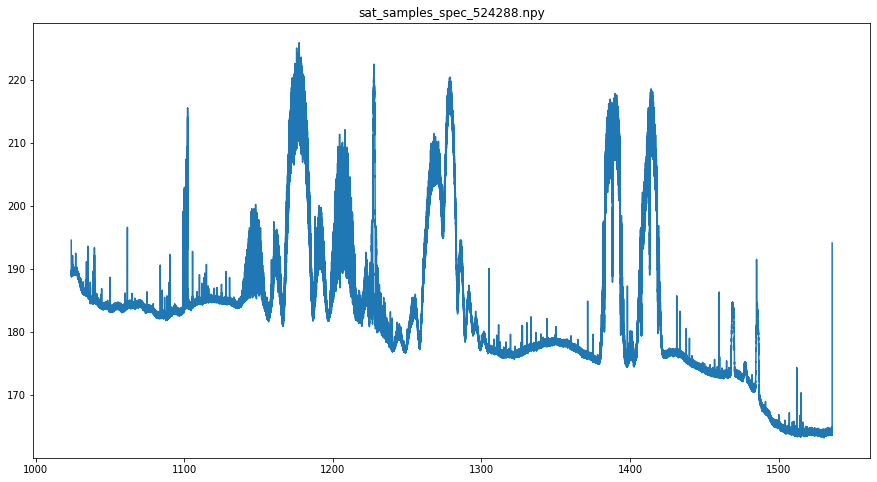

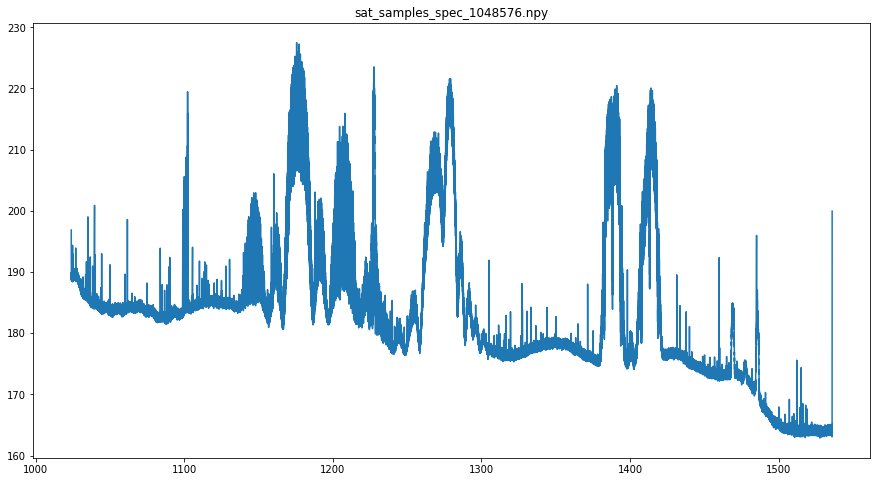

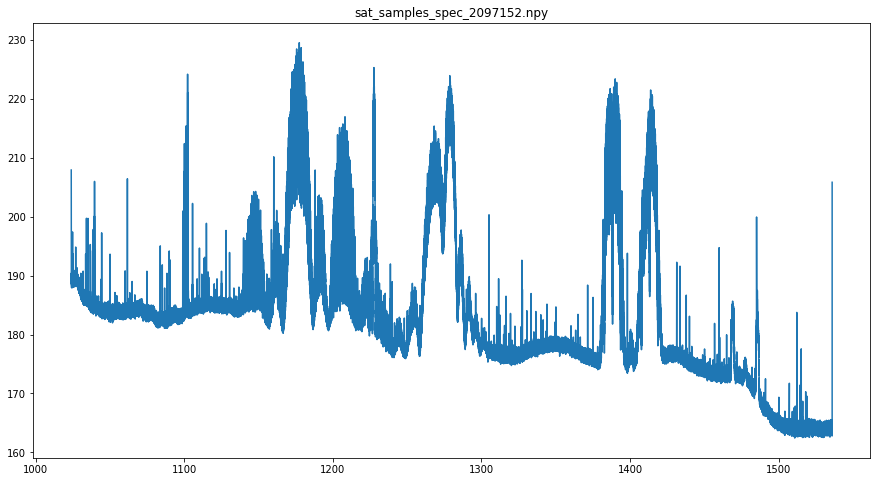

In [7]:
for fft_len in fft_len_list:
    npyname='sat_samples_spec_'+str(fft_len)+'.npy'
    with open(npyname, 'rb') as f:
        fig = plt.figure(figsize=(15,8))
        plt.title(npyname)
        plt.plot(np.linspace(1024,1536,num=fft_len//2),np.load(f)[1:])
        plt.savefig(npyname+".png", format="png")
        plt.show()